<a href="https://colab.research.google.com/github/awangberg/Math242_Linear_algebra_code_projects/blob/master/Image_SVD_Misc_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Values Decomposition and Images

In this project, we use the Singular Value Decomposition (SVD) to analyze a matrix which represents a picture and represent the picture using fewer than all of the singular values. 

First, we will import an image of a racoon and save it to our local directory (within Colab).

In [ ]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

In [ ]:
def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    #Make it grey-scale:
    rgb[:,:,0] = 0.33 * (r * a + (1.0 - a) * R) + 0.33 * g * a + (1.0 - a) * G + 0.33 * (b * a + (1.0 - a) * B)
    rgb[:,:,1] = 0.33 * (r * a + (1.0 - a) * R) + 0.33 * g * a + (1.0 - a) * G + 0.33 * (b * a + (1.0 - a) * B)
    rgb[:,:,2] = 0.33 * (r * a + (1.0 - a) * R) + 0.33 * g * a + (1.0 - a) * G + 0.33 * (b * a + (1.0 - a) * B)
    #have the image be color:
#    rgb[:,:,0] = r * a + (1.0 - a) * R
#    rgb[:,:,1] = g * a + (1.0 - a) * G
#    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

In [ ]:
#  Generate a picture to analyze and save it in our directory.
face = misc.face()
imageio.imwrite('face.png', face) #create the image file
#face = imageio.imread('face.jpg') # read in the image file
#face = rgba2rgb(imageio.imread('main_logo.png'))
face = rgba2rgb(imageio.imread('wsu_name_logo.png'))
face.shape, face.dtype

((107, 337, 3), dtype('uint8'))

In [ ]:
#  Read in face image:
#origImg = misc.face()
origImg = rgba2rgb(imageio.imread('wsu_name_logo.png'))
origImg.shape, origImg.dtype

#  The image contains three colors of data.  Color data extends from 0 to 256.
#  The pixel in entry [100, 100] has values of 94/256 for Red, 82/256 for green, and 92/256 for blue:
origImg[20][20]

array([81, 81, 81], dtype=uint8)

#  1.  The code below is used to adjust the number of singular values used within the image.

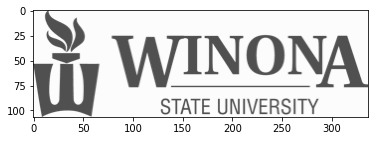

In [ ]:
#make a copy of the image
copyImg = origImg.copy()
plt.imshow(copyImg, origin='upper')

In [ ]:
r_image = copyImg[:, :, 0]
g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]

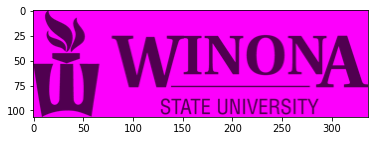

In [ ]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

#uncomment each pair to show the red, green, or blue image:

newImg[:,:,0] = r_image
plt.imshow(newImg, origin='upper')

#newImg[:,:,1] = g_image
#plt.imshow(newImg, origin='upper')

newImg[:,:,2] = b_image
plt.imshow(newImg, origin='upper')

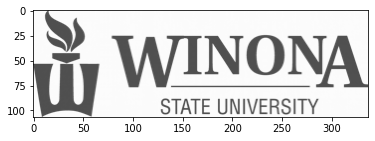

In [ ]:
r_image = copyImg[:, :, 0]
g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]


plt.imshow(r_image, origin='upper')

Ur, sr, Vhr = linalg.svd(r_image)
Ur.shape, sr.shape, Vhr.shape
Mr,Nr = r_image.shape
Sigr = linalg.diagsvd(sr,Mr,Nr)

Ug, sg, Vhg = linalg.svd(g_image)
Ug.shape, sg.shape, Vhg.shape
Mg,Ng = g_image.shape
Sigg = linalg.diagsvd(sg,Mg,Ng)

Ub, sb, Vhb = linalg.svd(b_image)
Ub.shape, sb.shape, Vhb.shape
Mb,Nb = b_image.shape
Sigb = linalg.diagsvd(sb,Mb,Nb)


# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()
SSigg = Sigg.copy()
SSigb = Sigb.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroBefore = 0
ZeroAfter = 320
#273
ZeroTo = min(SSigr.shape) - 1
for i in range(0,ZeroBefore):
    SSigr[i][i] = 0
    SSigg[i][i] = 0
    SSigb[i][i] = 0

for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0
    SSigg[i][i] = 0
    SSigb[i][i] = 0

# compute the new matrix using just these singular values for the red color:
new_r_image = Ur.dot(SSigr.dot(Vhr))
new_g_image = Ug.dot(SSigg.dot(Vhg))
new_b_image = Ub.dot(SSigb.dot(Vhb))


# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# But this code does it much faster:
newImg[:,:,0] = new_r_image
newImg[:,:,1] = new_g_image
newImg[:,:,2] = new_b_image

# YOU:  Modify the code above to pack the data for the other two colors:

plt.imshow(newImg, origin='upper')

#  save the image to your directory
filename = 'wsu_name_svd_red' + str(ZeroBefore) + '_to_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.
#plt.imshow()




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

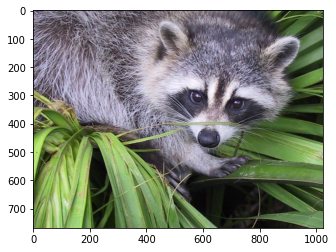

In [ ]:
#Original image:
plt.imshow(copyImg, origin='upper')

In [ ]:
#  save the image to your directory
filename = 'face_svd_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.

#2.  Analyze the impact of singular values.

Go back to Section 1, and adjust the code just using the ZeroAfter value.  Do this for several different values of ZeroAfter (e.g. 1, 5, 10, 15, 20, 25, 50, 100, 500, and 768).

Then, analyze the results by answering the following questions:

# Question 0:  
How large is the original picture?  ( size depends on rows, columns, and colors)

How large is the SVD decomposition?  (size depends on number of svds, number of eigenvectors used and size of matrices & and Vh, and number of colors)

How do these sizes compare?

#  Question 1:
What do you expect to see if we use just 1 singular value?

Did you see what you expected?

# Question 2:
What do you expect to see if we use all of the singular value?

Did you see what you expected?


#  Question 3:
Create images using 1, 5, 10, 20, or 25 singular value.  What happens to the image when we include more singular values?


# Question 4:
How many singular values do you need before you can roughly understand the picture?

# Question 5:

How many singular values do you need to include to eliminate the color artifacts in the image?

#  Question 6:

What is the behaviour of the singular values?  
The plot below shows each singular value on the horizontal axis, and the value of each singular value on the vertical axis.  What does this plot tell you about the singular values?


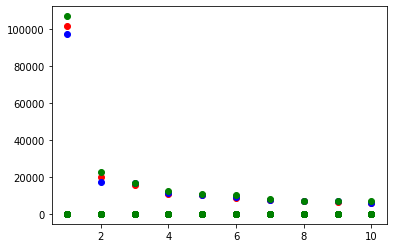

In [ ]:
#  Plot the first NumberOfSigs singular values

#  Make this 768 or less:
NumberOfSigs = 10  
x = np.linspace(1,NumberOfSigs,NumberOfSigs)
plt.plot(x,Sigr[0:NumberOfSigs], 'o', color='red');
plt.plot(x,Sigb[0:NumberOfSigs], 'o', color='blue');
plt.plot(x,Sigg[0:NumberOfSigs], 'o', color='green');
